In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk

In [5]:
!wget -O data.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-09-30 15:08:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-09-30 15:08:27 (17.2 MB/s) - ‘data.csv’ saved [874188/874188]



In [6]:
data = pd.read_csv('data.csv')

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [9]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [31]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = ['fuel_eficiency_mpg']

In [32]:
df[base].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

In [25]:
df.fuel_efficiency_mpg.isnull().sum()

np.int64(0)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

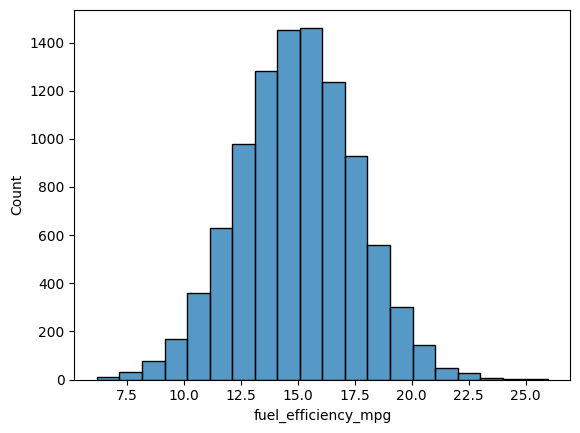

In [24]:
%matplotlib inline
sns.histplot(df.fuel_efficiency_mpg, bins=20)

## __Question 1__
There's one column with missing values. What is it?

__ANSWER:__ Horsepower

## __Question 2__
What's the median (50% percentile) for variable 'horsepower'?

In [30]:
df[df['horsepower'].isnull()==False].horsepower.median()

149.0

__ANSWER:__ 149.0

## __Question 3__
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>
Options: With 0 / With mean / Both are equally good

In [34]:
np.random.seed(42)

def tvt_data(df):
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

df_train, df_val, df_test = tvt_data(df)

In [36]:
def set_target(df_train, df_val, df_test):
    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values
    y_test_orig = df_test.fuel_efficiency_mpg.values
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    return y_train, y_val, y_test

y_train, y_val, y_test = set_target(df_train, df_val, df_test)

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
df[df['horsepower'].isnull()==False].horsepower.mean()

np.float64(149.65729212983547)

In [60]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [45]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [46]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred).round(2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred).round(2))

train: 0.46
validation: 0.46


__Replace nulls with 0:__ train: 0.52 / validation: 0.52 <br>
__Replace nulls with Mean:__ train: 0.46 / validation: 0.46

__ANSWER:__ The mean yields a better RMSE.

## __Question 4__
Now let's train a regularized linear regression. <br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>
Options: 0 / 0.01 / 1 / 10 / 100

In [49]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [50]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred).round(3))

     0 0.464
  0.01 0.463
     1 0.469
    10 0.47
   100 0.47


__ANSWER:__ An r value of 0.01 yields a better RMSE.

## __Question 5__
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. <br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>
What's the value of std? 0.001 / 0.006 / 0.060 / 0.600

In [55]:
def model(seed):
    np.random.seed(seed)
    data = pd.read_csv('data.csv')
    df = pd.DataFrame(data)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    df_train,df_val,df_test = tvt_data(df)
    y_train, y_val, y_test = set_target(df_train, df_val, df_test)
    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w_0 + X_train.dot(w)
    rmse_train = rmse(y_train, y_pred).round(3)
    #print('train:', rmse_train )
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred).round(3)
    #print('validation:', rmse_val)
    return rmse_train.item(), rmse_val.item()

In [56]:
scores = []
score = model(0)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    score = model(seed)
    scores.append(score[1])

In [57]:
np.std(scores).round(3).item()

0.006

__ANSWER:__ The standard deviation of the scores is 0.006.

## __Question 6__
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>
Options: 0.15 / 0.515 / 5.15 / 51.5

In [61]:
def model_reg(seed, reg):
    np.random.seed(seed)
    data = pd.read_csv('data.csv')
    df = pd.DataFrame(data)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    df_train,df_val,df_test = tvt_data(df)
    y_train, y_val, y_test = set_target(df_train, df_val, df_test)
    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)
    X_full_train = prepare_X(df_full_train)    

    y_full_train = np.concatenate([y_train,y_val])

    w_0, w = train_linear_regression_reg(X_full_train, y_full_train, reg)
    
    X_test = prepare_X(df_test)
    y_pred = w_0 + X_test.dot(w)
    
    return y_test, y_pred

y_test, y_pred = model_reg(9, .001)
rmse(y_test, y_pred).item()

0.5156261299169602

__ANSWER:__ The rmse is closest to 0.515.